# Bibliotecas e DF

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/data.xlsx")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Valores faltantes na identificação do cliente

In [ ]:
# Todos os valores faltantes
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Dropando os valores faltantes
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


# Preços unitários e quantidade de produtos

In [ ]:
# Produtos com preços iguais ou abaixo de 0
df[df['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,preco_total,month
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-05-12,0.0,12647,Germany,0.0,5
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16,0.0,16560,United Kingdom,0.0,12
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21,0.0,14911,EIRE,0.0,12
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-06-01,0.0,13081,United Kingdom,0.0,6
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-06-01,0.0,13081,United Kingdom,0.0,6
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13,0.0,15107,United Kingdom,0.0,1
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-10-02,0.0,17560,United Kingdom,0.0,10
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23,0.0,13239,United Kingdom,0.0,3
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30,0.0,13113,United Kingdom,0.0,3
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04,0.0,14410,United Kingdom,0.0,4


In [ ]:
# Produtos com quantidade igual ou abaixo de 0
df[df['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,preco_total,month


In [ ]:
# Filtrando somente os preços acima de 0
df = df[df['UnitPrice']>0]

In [ ]:
# Filtrando somente os produtos com quantidade acima de 0
df = df[df['Quantity']>0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


# Linhas Duplicadas

In [ ]:
# Linhas duplicadas
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-01-12 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-01-12 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-01-12 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-01-12 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-01-12 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-09-12 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-09-12 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-09-12 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-09-12 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
# Dropando linhas duplicadas
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392732 non-null  object 
 1   StockCode    392732 non-null  object 
 2   Description  392732 non-null  object 
 3   Quantity     392732 non-null  int64  
 4   InvoiceDate  392732 non-null  object 
 5   UnitPrice    392732 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


# Tipos de dados da coluna

In [ ]:
# Mudando o tipo de dados do ID e Data
df = df.astype({'CustomerID':int})
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%Y/%m/%d")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392728 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392728 non-null  object        
 1   StockCode    392728 non-null  object        
 2   Description  392728 non-null  object        
 3   Quantity     392728 non-null  int64         
 4   InvoiceDate  392728 non-null  datetime64[ns]
 5   UnitPrice    392728 non-null  float64       
 6   CustomerID   392728 non-null  int64         
 7   Country      392728 non-null  object        
 8   preco_total  392728 non-null  float64       
 9   month        392728 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 41.0+ MB


# Tratando Outliers

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


<Axes: >

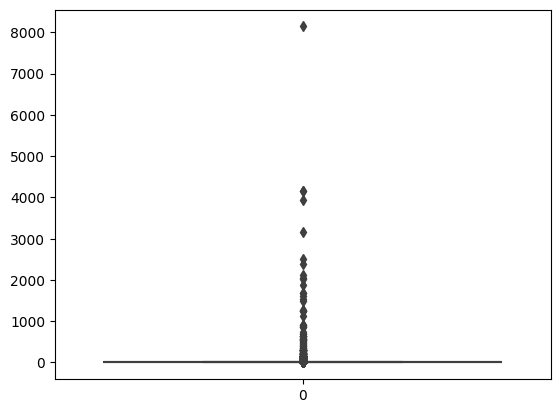

In [ ]:
# Outliers acima de 5k
sns.boxplot(df['UnitPrice'])

In [ ]:
# Filtrando preços abaixo de 5k
df = df[df['UnitPrice']<5000]

<Axes: >

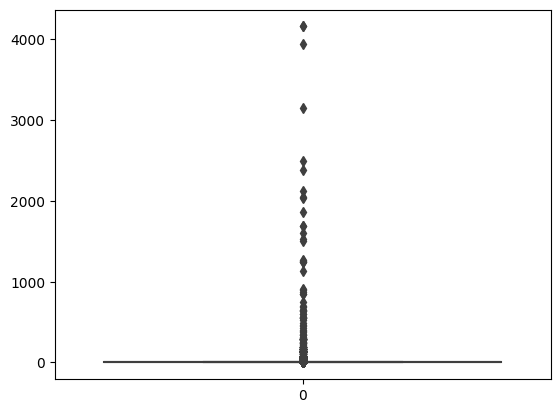

In [ ]:
# Sem Outliers (De acordo com as orientações)
sns.boxplot(df['UnitPrice'])

<Axes: >

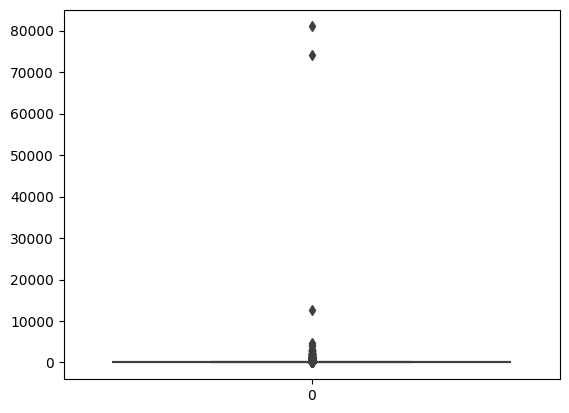

In [ ]:
# Outliers acima 10k
sns.boxplot(df['Quantity'])

In [ ]:
# Filtrando a quantidade de produtos abaixo de 10000 unidades
df = df[df['Quantity']<10000]

<Axes: >

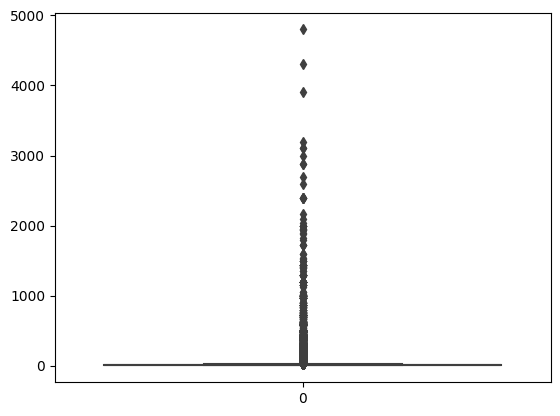

In [ ]:
# Sem Outliers (De acordo com as orientações)
sns.boxplot(df['Quantity'])

# Coluna Adicional

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


In [ ]:
# Calculando o preço total da venda
df['preco_total'] = df['UnitPrice']*df['Quantity']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,preco_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34


# Ultima data de venda

In [ ]:
# Data da ultima venda registrada no DF
ultima_vendas = df['InvoiceDate'].max()

# Plotando Gráficos

In [ ]:
# Paises com maior valor de vendas
df_paises_vendas = df.groupby('Country')['preco_total'].sum().sort_values(ascending=False).reset_index()

In [ ]:
df_paises_vendas = df_paises_vendas.head(10)
df_paises_vendas

,Country,preco_total
0,United Kingdom,7031228.694
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


<Axes: title={'center': 'Top 10 países com maior valor em vendas'}, xlabel='Country', ylabel='preco_total'>

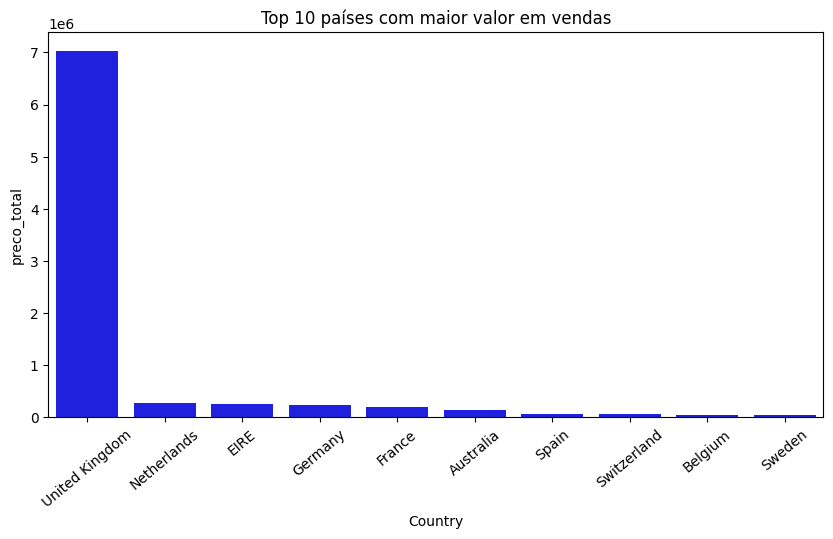

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=40)
plt.title('Top 10 países com maior valor em vendas')
sns.barplot(df_paises_vendas, x='Country',y='preco_total',color='blue')

In [ ]:
# Produtos mais vendidos
df_produtos_vendas = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index()

In [ ]:
df_produtos_vendas = df_produtos_vendas.head(10)
df_produtos_vendas

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1,JUMBO BAG RED RETROSPOT,46078
2,WHITE HANGING HEART T-LIGHT HOLDER,36706
3,ASSORTED COLOUR BIRD ORNAMENT,35263
4,PACK OF 72 RETROSPOT CAKE CASES,33670
5,POPCORN HOLDER,30919
6,RABBIT NIGHT LIGHT,27153
7,MINI PAINT SET VINTAGE,26076
8,PACK OF 12 LONDON TISSUES,25329
9,PACK OF 60 PINK PAISLEY CAKE CASES,24230


<Axes: title={'center': 'Top 10 produtos mais vendidos'}, xlabel='Description', ylabel='Quantity'>

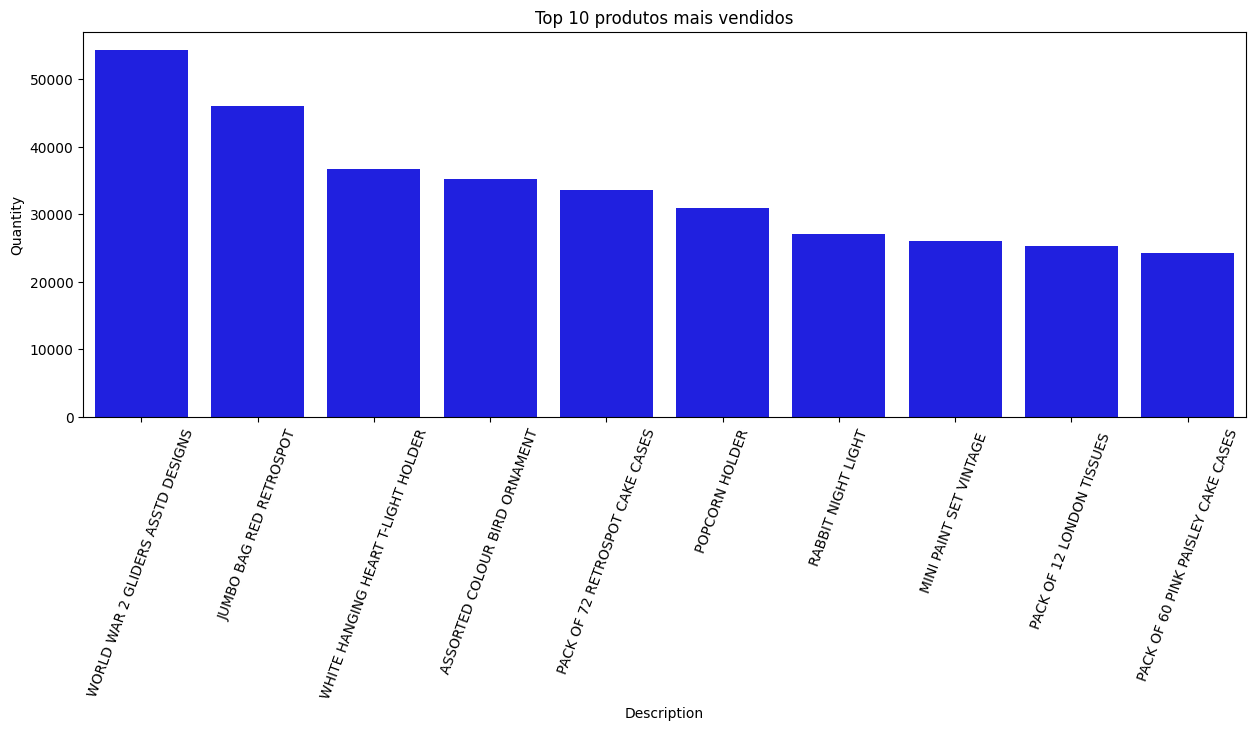

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=70)
plt.title('Top 10 produtos mais vendidos')
sns.barplot(df_produtos_vendas, x='Description',y='Quantity',color='blue')

In [ ]:
# Extraindo os meses
df['month'] = pd.DatetimeIndex(df['InvoiceDate']).month

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,preco_total,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,1


In [ ]:
# Valor total de vendas por mês
df_mes = df.groupby('month')['preco_total'].sum().sort_values(ascending=False).reset_index()

In [ ]:
df_mes = df_mes.head(15)
df_mes

,month,preco_total
0,11,1039157.810
1,9,963044.012
2,10,935414.330
3,7,787714.141
4,5,748844.180
5,6,718087.870
6,3,660367.450
7,8,646103.790
8,4,601577.861
9,1,569338.900


<Axes: title={'center': 'Top 10 produtos mais vendidos'}, xlabel='month', ylabel='preco_total'>

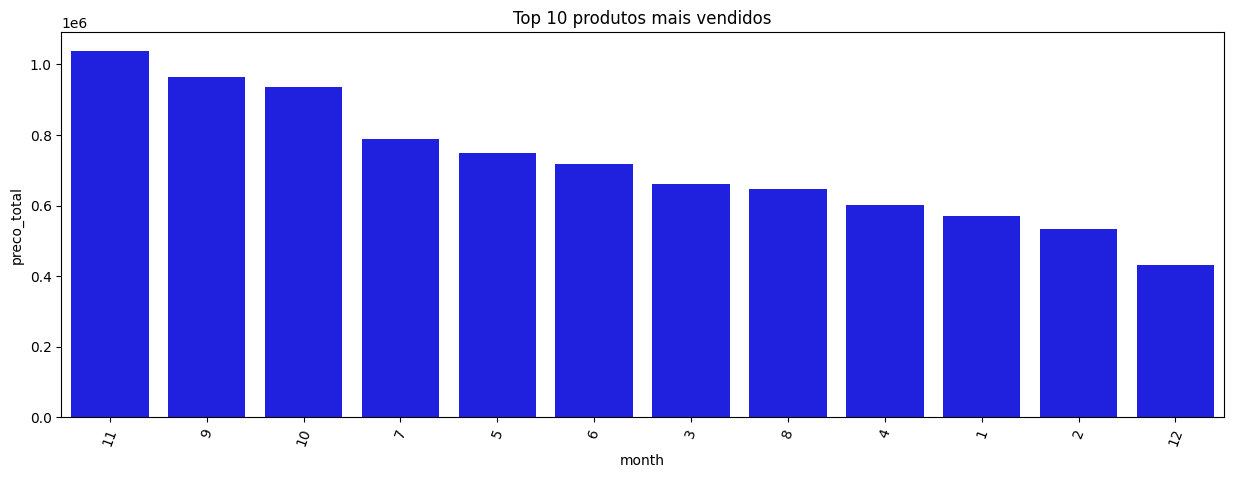

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=70)
plt.title('Valor de venda total por mês')
sns.barplot(df_mes, x='month',y='preco_total',order=df_mes['month'],color='blue')

In [ ]:
df_mes_pais = df.groupby(['Country','month'])['preco_total'].sum().sort_values(ascending=False).reset_index()

In [ ]:
df_mes_pais = df_mes_pais.head(70)

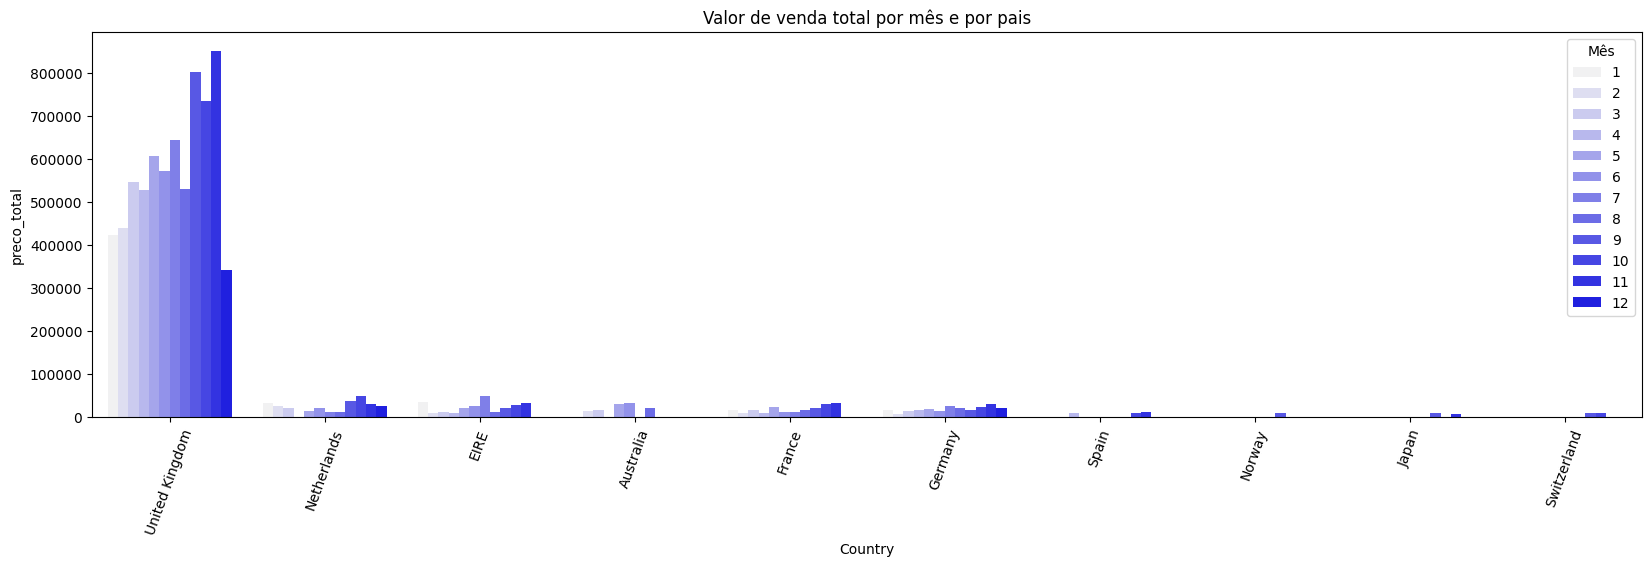

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=70)
plt.title('Valor de venda total por mês e por pais')
sns.barplot(df_mes_pais, x='Country',y='preco_total',hue='month',color='blue')
plt.legend(loc='upper right',title='Mês')

# RFM

In [ ]:
# Calculo do RFM
rfm = round(df.groupby(['CustomerID']).agg({'InvoiceDate':lambda x: (ultima_vendas - x.max()).days,'InvoiceNo':'count','preco_total':'mean'}),2)

In [ ]:
# Renomeando colunas
rfm = rfm.rename(columns={'InvoiceDate':'Recência','InvoiceNo':'Frequência','preco_total':'ticket_medio'})
rfm.head()

,Recência,Frequência,ticket_medio
CustomerID,,,
12347,40,182,23.68
12348,76,31,57.98
12349,19,73,24.08
12350,311,17,19.67
12352,73,85,29.48
